# **Decision Tree**

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [34]:
X,y=load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)


```
class sklearn.tree.DecisionTreeClassifier(*, 
                                          criterion='gini', 
                                          splitter='best', 
                                          max_depth=None, 
                                          min_samples_split=2, 
                                          min_samples_leaf=1, 
                                          min_weight_fraction_leaf=0.0, 
                                          max_features=None, 
                                          random_state=None, 
                                          max_leaf_nodes=None, 
                                          min_impurity_decrease=0.0, 
                                          class_weight=None, 
                                          ccp_alpha=0.0, 
                                          monotonic_cst=None)
```

**1. criterion{“gini”, “entropy”, “log_loss”}, default=”gini”**
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation.

**2. splitter{“best”, “random”}, default=”best”**
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

**3. max_depthint, default=None**
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**4. min_samples_splitint or float, default=2**
The minimum number of samples required to split an internal node:

**5. min_samples_leafint or float, default=1**
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

**6. min_weight_fraction_leaffloat, default=0.0**
The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

**7. max_featuresint, float or {“sqrt”, “log2”}, default=None**
The number of features to consider when looking for the best split:

If int, then consider max_features features at each split.

If float, then max_features is a fraction and max(1, int(max_features * n_features_in_)) features are considered at each split.

If “sqrt”, then max_features=sqrt(n_features).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.

**8. max_leaf_nodesint, default=None**
Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

**9. min_impurity_decreasefloat, default=0.0**
A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

The weighted impurity decrease equation is the following:

N_t / N * (impurity - N_t_R / N_t * right_impurity
                    - N_t_L / N_t * left_impurity)
where N is the total number of samples, N_t is the number of samples at the current node, N_t_L is the number of samples in the left child, and N_t_R is the number of samples in the right child.
N, N_t, N_t_R and N_t_L all refer to the weighted sum, if sample_weight is passed.

**10. class_weightdict, list of dict or “balanced”, default=None**
Weights associated with classes in the form {class_label: weight}. If None, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

**11. ccp_alphanon-negative float, default=0.0**
Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen.

In [35]:
clf=DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)


DecisionTreeClassifier(random_state=0)

In [36]:
y_train_predicted=clf.predict(X_train)
y_test_predicted=clf.predict(X_test)
print(accuracy_score(y_train,y_train_predicted))
print(accuracy_score(y_test,y_test_predicted))

1.0
0.8811188811188811


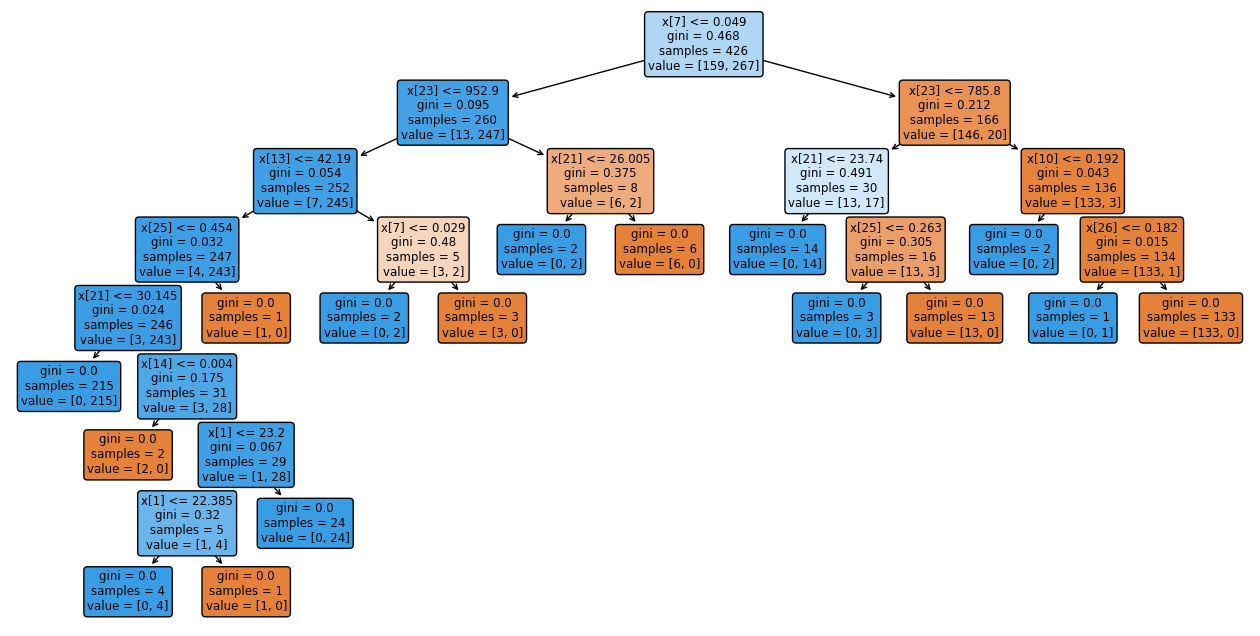

In [37]:
plt.figure(figsize=(16,8))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [38]:
path=clf.cost_complexity_pruning_path(X_train,y_train)
#path variable gives two things ccp_alphas and impurities
ccp_alphas,impurities=path.ccp_alphas,path.impurities
print("\nccp alpha wil give list of values :",ccp_alphas)
print("\n***********************************************************")
print("\nImpurities in Decision Tree :",impurities)


ccp alpha wil give list of values : [0.         0.00226647 0.00464743 0.0046598  0.0056338  0.00704225
 0.00784194 0.00911402 0.01144366 0.018988   0.02314163 0.03422475
 0.32729844]

***********************************************************

Impurities in Decision Tree : [0.         0.00453294 0.01847522 0.02313502 0.02876883 0.03581108
 0.04365302 0.05276704 0.0642107  0.0831987  0.10634033 0.14056508
 0.46786352]


In [39]:
clfs=[]   #will store all the models here
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)
    print("Last node in Decision tree is {} and ccp_alpha for last node is {}".format(clfs[-1].tree_.node_count,ccp_alpha))

Last node in Decision tree is 31 and ccp_alpha for last node is 0.0
Last node in Decision tree is 27 and ccp_alpha for last node is 0.0022664723976040134
Last node in Decision tree is 21 and ccp_alpha for last node is 0.004647426339100881
Last node in Decision tree is 19 and ccp_alpha for last node is 0.004659799593581376
Last node in Decision tree is 17 and ccp_alpha for last node is 0.005633802816901408
Last node in Decision tree is 15 and ccp_alpha for last node is 0.007042253521126761
Last node in Decision tree is 13 and ccp_alpha for last node is 0.007841938420144537
Last node in Decision tree is 11 and ccp_alpha for last node is 0.009114019793328328
Last node in Decision tree is 9 and ccp_alpha for last node is 0.011443661971830986
Last node in Decision tree is 7 and ccp_alpha for last node is 0.018988002086593604
Last node in Decision tree is 5 and ccp_alpha for last node is 0.023141627543035996
Last node in Decision tree is 3 and ccp_alpha for last node is 0.03422474765119576
L

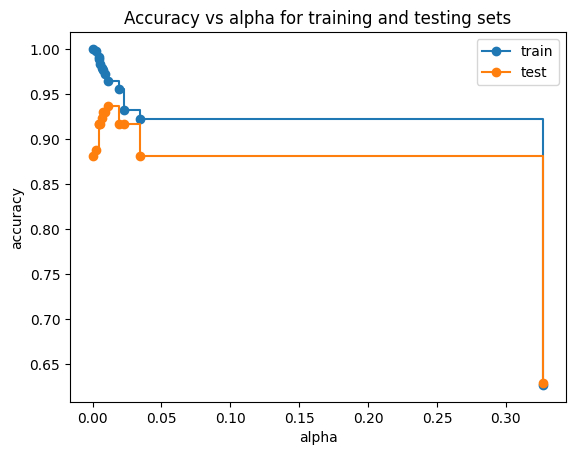

In [20]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

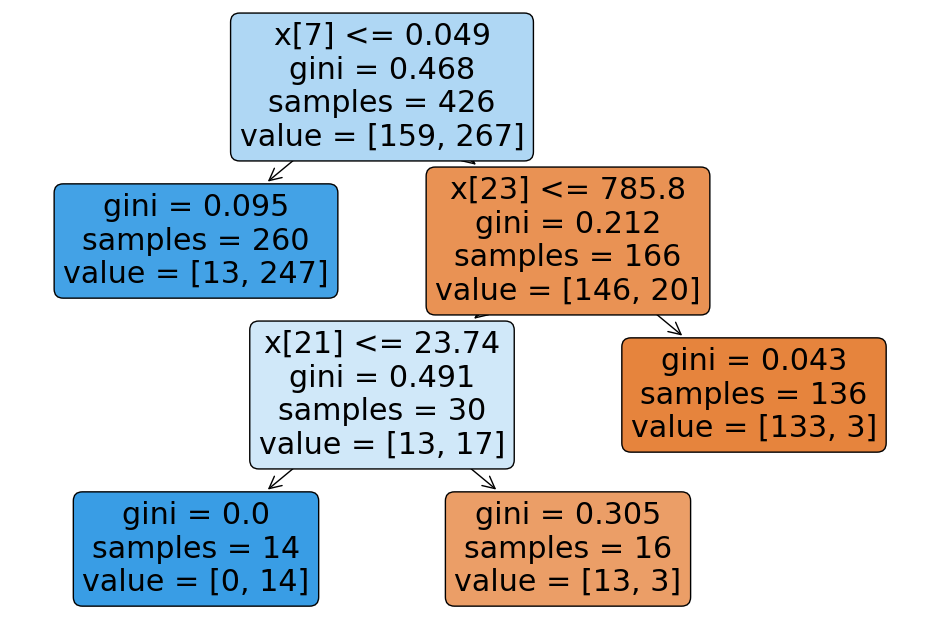

In [21]:
clf=DecisionTreeClassifier(random_state=0,ccp_alpha=0.02)
clf.fit(X_train,y_train)
plt.figure(figsize=(12,8))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [22]:
print(accuracy_score(y_test,clf.predict(X_test)))

0.916083916083916


## **Pre-Pruning**

1. Pre-Pruning can be done using **Hyperparameter tuning**.

2. use **GridSearchCV** for Hyperparameter tuning.

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
grid_param={"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(2,50,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1) 
            }

In [25]:
clf=DecisionTreeClassifier(random_state=0)

In [26]:
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 50),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']})

In [29]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 9, 'splitter': 'random'}


In [28]:
clf=DecisionTreeClassifier(criterion= 'gini',
                           max_depth= 8,
                           min_samples_leaf= 2,
                           min_samples_split= 9,
                           splitter= 'random')


In [30]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=9,
                       splitter='random')

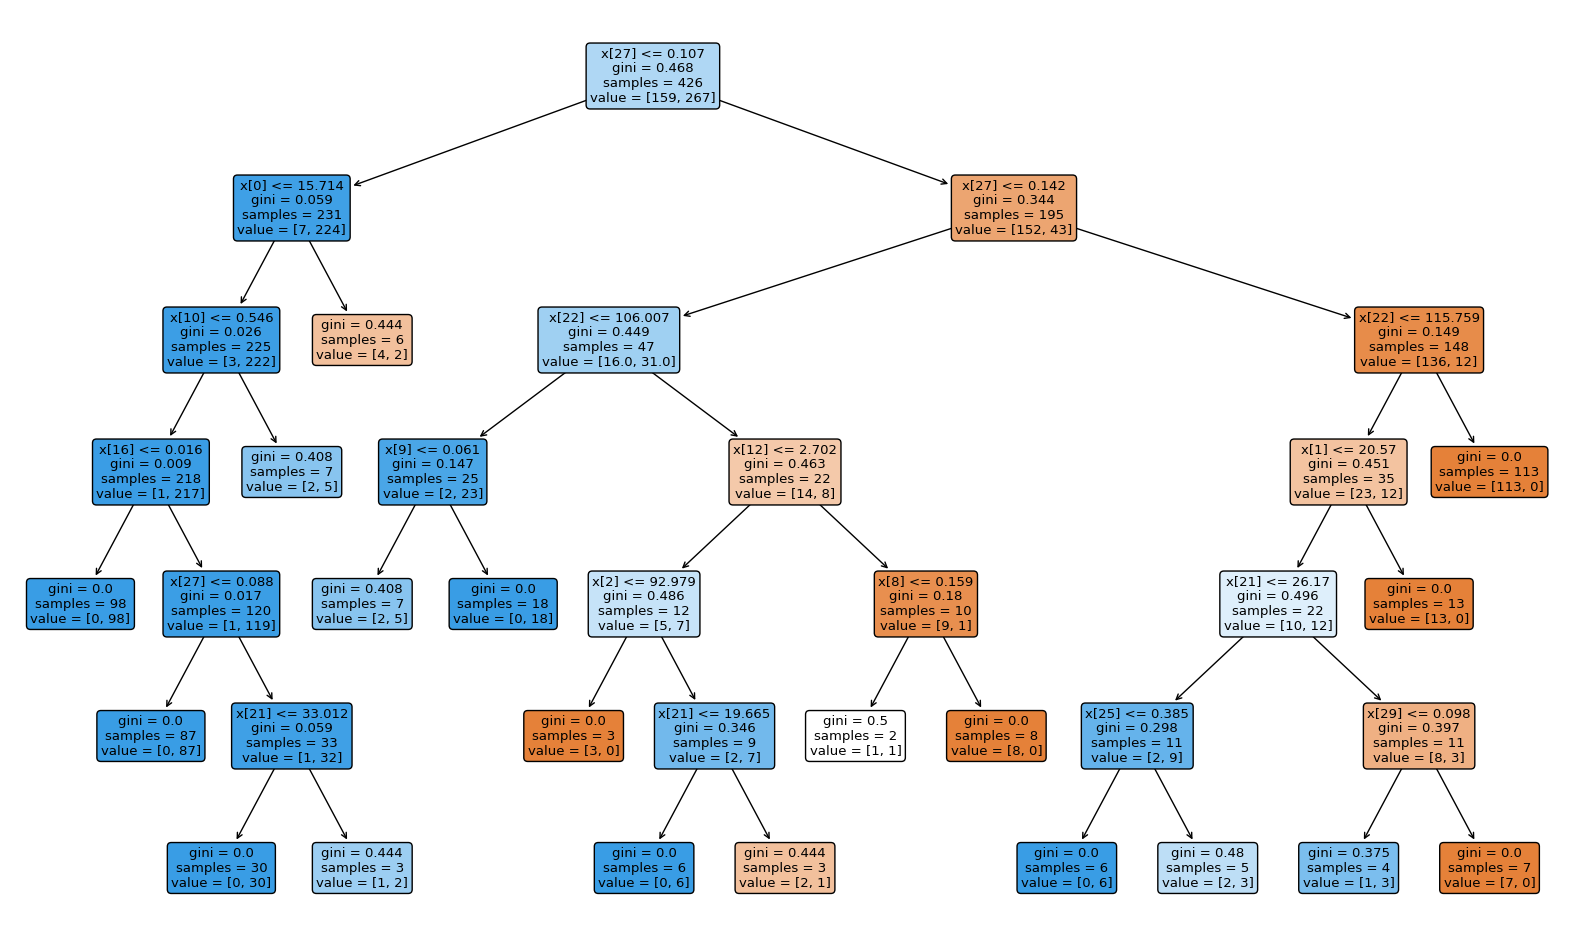

In [31]:
plt.figure(figsize=(20,12))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [32]:
print(accuracy_score(y_test,clf.predict(X_test)))

0.9230769230769231
